In [163]:
# import all necessary packages
import pandas as pd
import numpy as np


# import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
# import ML related packages of sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import plotly.express as px
import plotly.graph_objects as go


In [164]:
# load data to a new dataframe
df = pd.read_csv("data.csv")

In [165]:
# describe the dataframe with some statistical info
df.describe()

,WPM 1,WPM 2,WPM 3,Accuracy 1,Accuracy 2,Accuracy 3,average_wpm,average_accuracy,second_1,second_2,second_3,second_4,second_5,average_second,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,0.0,0.0,0.0,0.0
mean,47.523810,49.571429,49.095238,0.952281,0.971857,0.962329,48.730159,0.970448,550.190476,545.857143,503.809524,545.380952,538.380952,536.723810,NaN,NaN,NaN,NaN
std,13.611095,11.047947,10.501927,0.067512,0.035150,0.049450,11.353227,0.042993,189.945155,184.062024,169.833924,162.813843,171.546925,155.218111,NaN,NaN,NaN,NaN
min,20.000000,28.000000,34.000000,0.700000,0.890000,0.820000,28.000000,0.812000,241.000000,247.000000,246.000000,258.000000,258.000000,274.800000,NaN,NaN,NaN,NaN
25%,41.000000,44.000000,44.000000,0.940000,0.960000,0.950000,44.000000,0.951100,390.000000,345.000000,389.000000,424.000000,394.000000,403.400000,NaN,NaN,NaN,NaN
50%,46.000000,47.000000,47.000000,0.973700,0.980400,0.970000,47.333333,0.980000,545.000000,605.000000,466.000000,584.000000,572.000000,560.400000,NaN,NaN,NaN,NaN
75%,54.000000,55.000000,54.000000,1.000000,1.000000,1.000000,54.000000,1.000000,665.000000,684.000000,672.000000,630.000000,622.000000,646.200000,NaN,NaN,NaN,NaN
max,76.000000,73.000000,76.000000,1.000000,1.000000,1.000000,75.000000,1.000000,957.000000,827.000000,922.000000,856.000000,889.000000,818.400000,NaN,NaN,NaN,NaN


In [166]:
figure = px.scatter(data_frame=df, x='average_wpm', y='average_second', size='average_second', trendline='ols')
figure.show()

In [167]:
average_wpm = df[['average_wpm']]
average_accuracy = df[['average_accuracy']]
average_second = df[['average_second']]
average_second

,average_second
0,377.6
1,508.8
2,560.4
3,320.6
4,639.4
5,732.4
6,392.2
7,403.4
8,818.4
9,274.8


STANDARIZATION VARIBEL "average_accuracy"

In [168]:
from sklearn.preprocessing import StandardScaler

In [169]:
new_accuracy = pd.DataFrame(StandardScaler().fit_transform(average_accuracy), columns=average_accuracy.columns)
new_accuracy.head()

,average_accuracy
0,0.358759
1,-0.461131
2,-0.725689
3,-3.776442
4,0.704352


NORMALISASI 'average_wpm' dan 'average_second'

In [170]:
from sklearn.preprocessing import MinMaxScaler

In [171]:
#Normalize average_wpm
new_wpm = pd.DataFrame(MinMaxScaler().fit_transform(average_wpm), columns=average_wpm.columns)
new_wpm.head()
new_wpm.dtypes

average_wpm    float64
dtype: object

In [172]:
#Normalize average_second
new_second = pd.DataFrame(MinMaxScaler().fit_transform(average_second), columns=average_second.columns)
new_second.head()

,average_second
0,0.189110
1,0.430464
2,0.525386
3,0.084253
4,0.670714


In [173]:

X = pd.concat([new_accuracy, new_wpm], axis=1)
y = new_second



In [174]:
results = []

In [175]:
# Loop untuk menguji setiap random_state dari 1 hingga 100
for random_state in range(1, 101):
    # Bagi data menjadi data latih dan data uji
    x_train, x_test, y_train, y_test = train_test_split(new_accuracy, new_wpm, test_size=0.3, random_state=random_state)
    
    # Buat model regresi linear
    model = LinearRegression()
    
    # Latih model pada data latih
    model.fit(x_train, y_train)
    
    # Lakukan prediksi pada data uji
    y_pred = model.predict(x_test)
    
    # Hitung metrik evaluasi
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Simpan hasil metrik dalam bentuk tuple
    result = (random_state, rmse, mae, mse, r2)
    
    # Tambahkan tuple hasil metrik ke dalam list results
    results.append(result)

In [176]:
# Konversi list hasil metrik menjadi DataFrame
results_df = pd.DataFrame(results, columns=['Random State', 'RMSE', 'MAE', 'MSE', 'R2'])

In [177]:
# Atur jumlah baris yang ditampilkan
pd.set_option("display.max_rows", None)

# Cetak DataFrame results_df
print(results_df)

    Random State      RMSE       MAE       MSE         R2
0              1  0.358244  0.256398  0.128339  -9.986275
1              2  0.271551  0.238504  0.073740  -1.212902
2              3  0.236969  0.174490  0.056154  -0.143283
3              4  0.458924  0.332135  0.210611  -2.838413
4              5  0.249110  0.171282  0.062056  -0.297717
5              6  0.143222  0.113160  0.020513  -1.790886
6              7  0.245692  0.186921  0.060365  -0.676990
7              8  0.374480  0.324930  0.140235  -0.758388
8              9  0.243917  0.172283  0.059495  -0.674232
9             10  0.230312  0.154055  0.053044  -1.156655
10            11  0.450831  0.305603  0.203248  -2.844773
11            12  0.342135  0.270814  0.117056  -0.429482
12            13  0.277519  0.229749  0.077017  -1.167296
13            14  0.346301  0.281293  0.119924  -0.170889
14            15  0.361583  0.260170  0.130742  -0.839470
15            16  0.404287  0.268157  0.163448 -18.711098
16            

In [178]:
# train the model using training dataumns
model.fit(x_train, y_train)  

LinearRegression()

In [179]:
# print coefficients
model.coef_

array([[-0.00248499]])

In [180]:
# print y_intercept | bias
model.intercept_

array([0.35566912])

In [181]:
# make predictions using test data
y_pred = model.predict(x_test)

In [182]:
# let's calculate the metrics
mse_2 = mean_squared_error(y_test, y_pred)
import math
rmse_2 = math.sqrt(mse_2)
mae_2 = mean_absolute_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

Text(0, 0.5, 'Predicted')

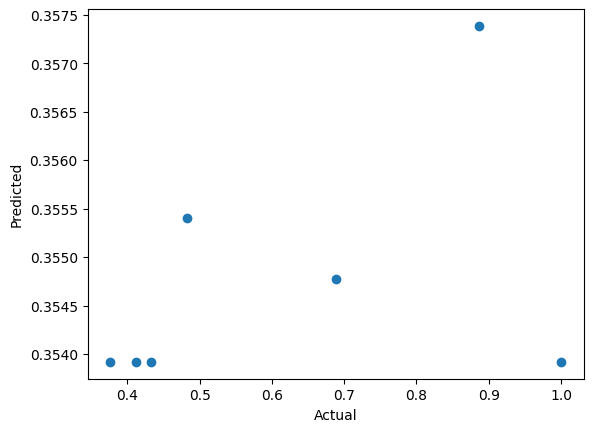

In [183]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='average_wpm'>

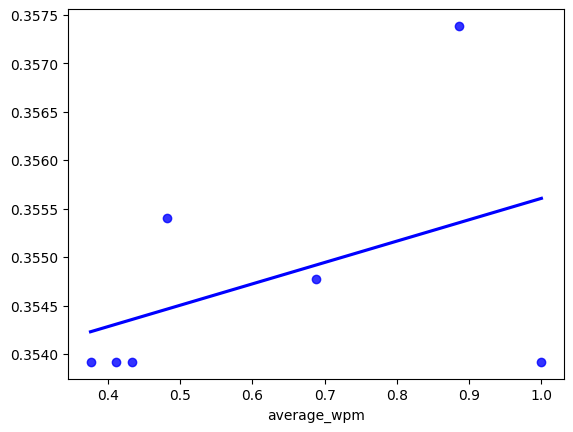

In [184]:
# plot regression model line
sns.regplot(x=y_test, y=y_pred, ci=None, color ='blue')

In [185]:
# create a metrics dataframe using metric values
metrics = {
    'Model': ['First'],
    'MSE' : [mse_2],
    'RMSE' : [rmse_2],
    'MAE' : [mae_2],
    'R2' : [r2_2]
    }

metrics_df = pd.DataFrame(data=metrics)

# compare the values
metrics_df

,Model,MSE,RMSE,MAE,R2
0,First,0.119212,0.34527,0.256194,-1.215336
